# Feature Engineering of AirBnB Dataset
**BrainStation Capstone Project**
- **Author:** Harry Han
- **Date:** 2023/04/06

## Table of Contents

[1. Introduction](#1-introduction)
<br>
[2. Data preparation](#2-data-preparation)
<br>
[3. Price](#3-price)
<br>
[4. Host-related features](#4-host-related-features)
<br>
[5. Listing-related features](#5-listing-related-features)
<br>
[6. Separation into healthy and unhealthy listings](#6-separation-into-healthy-and-unhealthy-listings)
<br>
[7. Train-test split](#7-train-test-split)
<br>
[8. Summary](#8-summary)


## 1. Introduction

In this notebook, we perform feature engineering on an AirBnB dataset in order to create models that predict the optimal price of AirBnB listings. The [dataset](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz) contains detailed information on AirBnB listings in New York City and was collected in December 2022 by [Inside AirBnB](http://insideairbnb.com/get-the-data/).

We start by exploring each feature of the dataset, extracting essential information, and transforming it into a form that can be passed to regression models. The regression models are presented in a separate notebook, `Harry_Han_AirBnBPricing_Main.ipynb`.

The notebook is structured as follows: In [Section 2](#2-data-preparation), we prepare the dataset and check the size and descriptions of each feature. In [Section 3](#3-price), we process the listing prices, which are the target variable of our prediction model. [Section 4](#4-host-related-features) and [5](#5-listing-related-features) focus on host- and listing-related features, respectively. In [Section 6](#6-separation-into-healthy-and-unhealthy-listings), we separate the dataset into healthy and unhealthy listings based on their number of reviews and their average scores. In [Section 7](#7-train-test-split), we split the dataset of healthy listings into training and testing data. Finally, we summarize our work in [Section 8](#8-summary).

## 2. Data preparation

First, we import basic libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We read the dataset downloaded as `listings.csv` located in `data` folder.

In [2]:
df = pd.read_csv('data/listings.csv')

/var/folders/gb/lnfs6rn53blb3xs_kbdwr8_h0000gp/T/ipykernel_4720/3800788481.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/listings.csv')


It gives a DtypeWarning that column at index 68 has mixed types. So we can investigate this column first. Before that, we check the shape of the dataframe.

In [3]:
df.shape

(41533, 75)

There are 41,533 rows and 75 columns.

In [4]:
df.columns[68]

'license'

The column that gave a warning is `license`. We check the percentage of missing values in this column to see if they caused a confusion in data type.

In [5]:
df['license'].isna().sum()/len(df)*100.

99.99759227602148

Indeed, 99.998 % of the rows have missing values. Therefore, we drop `license` column as it has few entries.

In [6]:
df.drop(columns=['license'], inplace=True)

Next, we take peek at a few rows of the dataframe.

In [7]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.77,4.80,4.81,4.40,f,3,3,0,0,0.31
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.97,4.95,4.94,4.92,f,1,0,1,0,0.73
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,5.00,4.67,5.00,f,1,1,0,0,0.03
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.91,4.47,4.52,f,2,0,2,0,0.30
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.84,4.80,4.67,4.56,f,1,1,0,0,1.13


Each row corresponds a single listing in NYC. The description of each column is presented below, which was retrieved from [Inside Airbnb Data Dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing).

| `Field`                                        | `Type`                      | `Description`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|----------------------------------------------|---------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                                           | integer                   | Airbnb's unique identifier for the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| listing_url                                  | text                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| scrape_id                                    | bigint                    | Inside Airbnb "Scrape" this was part of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |   |
| last_scraped                                 | datetime                  | UTC. The date and time this listing was "scraped".                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |   |
| source                                       | text                      | One of "neighbourhood search" or "previous scrape". "neighbourhood search" means that the listing was found by searching the city, while "previous scrape" means that the listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| name                                         | text                      | Name of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| description                                  | text                      | Detailed description of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| neighborhood_overview                        | text                      | Host's description of the neighbourhood                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |   |
| picture_url                                  | text                      | URL to the Airbnb hosted regular sized image for the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |
| host_id                                      | integer                   | Airbnb's unique identifier for the host/user                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |
| host_url                                     | text                      | The Airbnb page for the host                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   |
| host_name                                    | text                      | Name of the host. Usually just the first name(s).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
| host_since                                   | date                      | The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |   |
| host_location                                | text                      | The host's self reported location                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
| host_about                                   | text                      | Description about the host                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |   |
| host_response_time                           |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_response_rate                           |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_acceptance_rate                         |                           | That rate at which a host accepts booking requests.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| host_is_superhost                            | boolean [t=true; f=false] |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_thumbnail_url                           | text                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_picture_url                             | text                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_neighbourhood                           | text                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_listings_count                          | text                      | The number of listings the host has (per Airbnb calculations)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| host_total_listings_count                    | text                      | The number of listings the host has (per Airbnb calculations)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| host_verifications                           |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_has_profile_pic                         | boolean [t=true; f=false] |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| host_identity_verified                       | boolean [t=true; f=false] |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| neighbourhood                                | text                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| neighbourhood_cleansed                       | text                      | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| neighbourhood_group_cleansed                 | text                      | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |   |
| latitude                                     | numeric                   | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| longitude                                    | numeric                   | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| property_type                                | text                      | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| room_type                                    | text                      | [Entire home/apt\|Private room\|Shared room\|Hotel]  All homes are grouped into the following three room types:  Entire place Private room Shared room Entire place Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies first floor of the home"), and provide further details on the listing.  Private rooms Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.  Shared rooms Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays. |   |
| accommodates                                 | integer                   | The maximum capacity of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| bathrooms                                    | numeric                   | The number of bathrooms in the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |
| bathrooms_text                               | string                    | The number of bathrooms in the listing.  On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |   |
| bedrooms                                     | integer                   | The number of bedrooms                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |
| beds                                         | integer                   | The number of bed(s)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |
| amenities                                    | json                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| price                                        | currency                  | daily price in local currency                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| minimum_nights                               | integer                   | minimum number of night stay for the listing (calendar rules may be different)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |   |
| maximum_nights                               | integer                   | maximum number of night stay for the listing (calendar rules may be different)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |   |
| minimum_minimum_nights                       | integer                   | the smallest minimum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| maximum_minimum_nights                       | integer                   | the largest minimum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |
| minimum_maximum_nights                       | integer                   | the smallest maximum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| maximum_maximum_nights                       | integer                   | the largest maximum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |
| minimum_nights_avg_ntm                       | numeric                   | the average minimum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |
| maximum_nights_avg_ntm                       | numeric                   | the average maximum_night value from the calender (looking 365 nights in the future)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |
| calendar_updated                             | date                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| has_availability                             | boolean                   | [t=true; f=false]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
| availability_30                              | integer                   | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| availability_60                              | integer                   | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| availability_90                              | integer                   | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| availability_365                             | integer                   | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| calendar_last_scraped                        | date                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| number_of_reviews                            | integer                   | The number of reviews the listing has                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |   |
| number_of_reviews_ltm                        | integer                   | The number of reviews the listing has (in the last 12 months)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |   |
| number_of_reviews_l30d                       | integer                   | The number of reviews the listing has (in the last 30 days)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |   |
| first_review                                 | date                      | The date of the first/oldest review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| last_review                                  | date                      | The date of the last/newest review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |   |
| review_scores_rating                         |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| review_scores_accuracy                       |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| review_scores_cleanliness                    |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| review_scores_checkin                        |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| review_scores_communication                  |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| review_scores_location                       |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| review_scores_value                          |                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   |
| license                                      | text                      | The licence/permit/registration number                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |
| instant_bookable                             | boolean                   | [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |   |
| calculated_host_listings_count               | integer                   | The number of listings the host has in the current scrape, in the city/region geography.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |   |
| calculated_host_listings_count_entire_homes  | integer                   | The number of Entire home/apt listings the host has in the current scrape, in the city/region geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |   |
| calculated_host_listings_count_private_rooms | integer                   | The number of Private room listings the host has in the current scrape, in the city/region geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |   |
| calculated_host_listings_count_shared_rooms  | integer                   | The number of Shared room listings the host has in the current scrape, in the city/region geography                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |   |
| reviews_per_month                            | numeric                   | The number of reviews the listing has over the lifetime of the listing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |   |

Although these are hard to parse at a glance, we go through each of these features to extract useful information.

## 3. Price

We first work with `price` column as it is the target variable of our prediction model.

In [8]:
df['price'].tail()

41528      $105.00
41529       $87.00
41530       $70.00
41531      $125.00
41532    $1,114.00
Name: price, dtype: object

We remove the dollar sign and commas, and convert them to `float` data type.

In [9]:
# Replace dollar signs and commas as an empty string in price column, and cast to float.
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['price'].tail()

41528     105.0
41529      87.0
41530      70.0
41531     125.0
41532    1114.0
Name: price, dtype: float64

We also check the number of missing values in `price`.

In [10]:
df['price'].isna().sum()

0

There are no missing values in `price`. Next, we check the distribution of listing prices using box plot.

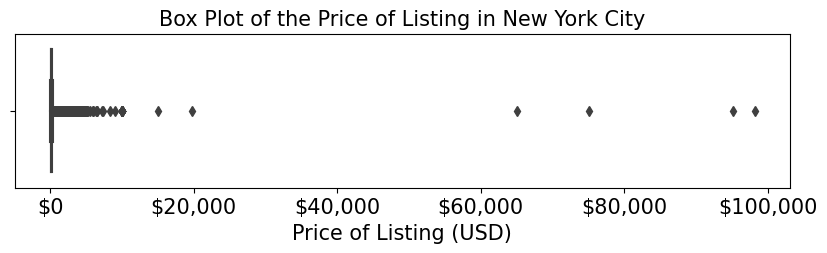

In [11]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'])
plt.xlabel('Price of Listing (USD)', fontsize=15)
plt.title('Box Plot of the Price of Listing in New York City', fontsize=15)
plt.tick_params('both', labelsize=15)
# Set format of xticks as dollar
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

In [12]:
df[['price']].describe()

,price
count,41533.000000
mean,221.978282
std,919.502236
min,0.000000
25%,80.000000
50%,131.000000
75%,220.000000
max,98159.000000


The prices range from $0 to $98,159, where listings with nightly price in the order of tens of thousand dollars seem to be fault. We observe prices greater than $20,000.

In [13]:
df[df['price'] > 20000.][['listing_url', 'price']]

,listing_url,price
9351,https://www.airbnb.com/rooms/15604499,75120.0
9543,https://www.airbnb.com/rooms/16289102,65115.0
31559,https://www.airbnb.com/rooms/563183407738604083,98159.0
37160,https://www.airbnb.com/rooms/706066765395654135,95110.0


Using `listing_url`, we can take a look at current prices of two of these listings as below.

In [14]:
from IPython.display import display, HTML

# HTML of listings were obtained from Share -> Embed feature in the listing page.
listing_1 = '<div class="airbnb-embed-frame" data-id="16289102" data-view="home" style="width:450px;height:300px;margin:auto"><a href="https://www.airbnb.com/rooms/16289102?guests=1&amp;adults=1&amp;s=66&amp;source=embed_widget">View On Airbnb</a><a href="https://www.airbnb.com/rooms/16289102?guests=1&amp;adults=1&amp;s=66&amp;source=embed_widget" rel="nofollow">Comfy private room, great location to Manhattan</a><script async="" src="https://www.airbnb.com/embeddable/airbnb_jssdk"></script></div>'
listing_2 = '<div class="airbnb-embed-frame" data-id="563183407738604083" data-view="home" style="width:450px;height:300px;margin:auto"><a href="https://www.airbnb.com/rooms/563183407738604083?guests=1&amp;adults=1&amp;s=66&amp;source=embed_widget">View On Airbnb</a><a href="https://www.airbnb.com/rooms/563183407738604083?guests=1&amp;adults=1&amp;s=66&amp;source=embed_widget" rel="nofollow">A cozy one bedroom in ocean hill Brooklyn...</a><script async="" src="https://www.airbnb.com/embeddable/airbnb_jssdk"></script></div>'

display(HTML(listing_1), HTML(listing_2))

Indeed, the current prices of these listings look normal. Thus, the abnormal prices were likely to be set by hosts just to prevent bookings, in December 2022. There are also listings with $0 price.

In [15]:
len(df[df['price'] == 0.])

30

These 30 listing prices are also likely to be falsely set, or as placeholders. Therefore, we impute these prices with the median price.

In [16]:
df.loc[(df['price'] > 20000.) | (df['price'] == 0.), 'price'] = df['price'].median()

Now we draw a histogram of `price` to see the shape of its distribution.

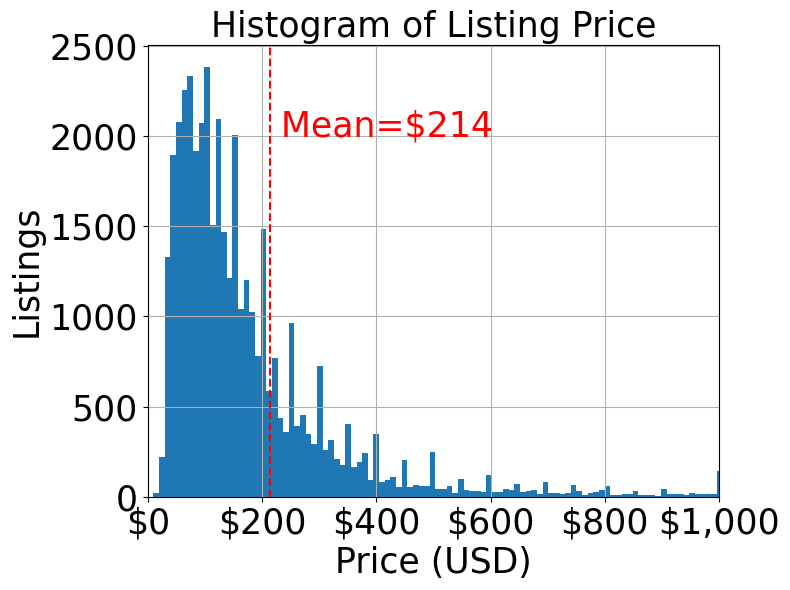

In [17]:
df['price'].hist(bins=2000, figsize=(8, 6))
plt.axvline(df['price'].mean(), ls='--', c='r')
plt.text(df['price'].mean(), 2000., ' Mean=' + '${:,.0f}'.format(df['price'].mean()), c='r', ha='left', fontsize=25)
plt.title('Histogram of Listing Price', fontsize=25)
plt.xlabel('Price (USD)', fontsize=25)
plt.ylabel('Listings', fontsize=25)
plt.xlim(left=0., right=1000.)
plt.tick_params('both', labelsize=25)
# Set format of xticks as dollar
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.savefig('figures/hist_price.pdf')
plt.show()

The above histrogram is right-skewed, which is not ideal as a target variable. The model's predictability, especially for linear regression models under central limit theorem, could be improved if the target variable is normally distributed. For this, we can apply a log-transformation to `price` to alleviate the skewness.

In [18]:
df['log_price'] = np.log(df['price'])

The histogram of `log_price` is checked as below.

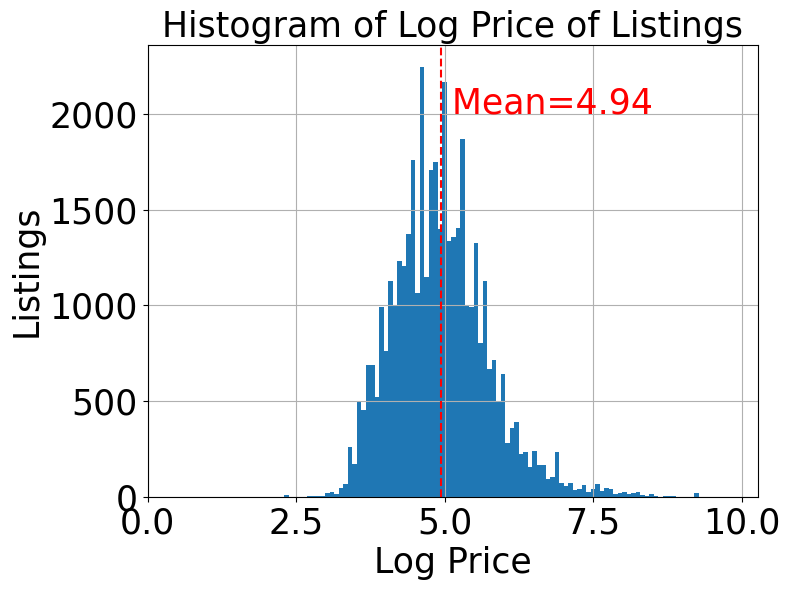

In [19]:
df['log_price'].hist(bins=100, figsize=(8, 6))
plt.axvline(df['log_price'].mean(), ls='--', c='r')
plt.text(df['log_price'].mean(), 2000., ' Mean=' + str(np.round(df['log_price'].mean(), 2)), c='r', ha='left', fontsize=25)
plt.title('Histogram of Log Price of Listings', fontsize=25)
plt.xlabel('Log Price', fontsize=25)
plt.ylabel('Listings', fontsize=25)
plt.xlim(left=0.)
plt.tick_params('both', labelsize=25)
plt.tight_layout()
plt.savefig('figures/hist_log_price.pdf')
plt.show()

Now `log_price` is closer to a normal distribution. We use `log_price` as our target variable, and we drop `price` from the dataframe.

In [20]:
df.drop(columns=['price'], inplace=True)

## 4. Host-related features

Here we look at features that are related to host information. We start with `host_since` column, which represents the date when the host was registered.

In [21]:
df['host_since'].head()

0    2008-09-09
1    2009-02-05
2    2009-02-03
3    2009-02-03
4    2009-05-06
Name: host_since, dtype: object

The values are strings of year-month-date, which can be converted to a datetime format. In order to transform it to a numeric feature, rather than a datetime, we can compute the datetime difference between `last_scraped` and `host_since` to represent the number of days elapsed since the host was registered. We assign this as our new `host_since`.

In [22]:
# Compute the datetime difference between last_scraped and host_since in days
df['host_since'] = (pd.to_datetime(df['last_scraped']) - pd.to_datetime(df['host_since'])).dt.days
df['host_since'].head()

0    5200.0
1    5051.0
2    5052.0
3    5053.0
4    4961.0
Name: host_since, dtype: float64

Now `host_since` is numeric. The number of missing values is checked below.

In [23]:
df['host_since'].isna().sum()

5

There are 5 missing values in `host_since`. To impute these, we check its box plot to see if it's skewed. If it is strongly skewed, median might be prefered to the mean value.

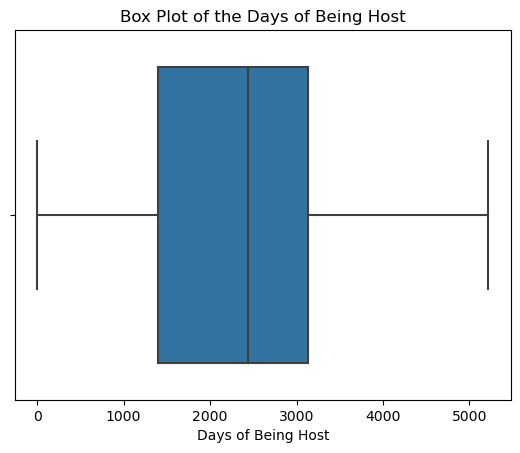

In [24]:
sns.boxplot(x=df['host_since'])
plt.xlabel('Days of Being Host')
plt.title('Box Plot of the Days of Being Host')
plt.show()

`host_since` does not seem to be skewed so that we can use the mean value to impute missing values.

In [25]:
df['host_since'].fillna(df['host_since'].mean(), inplace=True)

As `host_since` is the number of days, we set the data type as integer.

In [26]:
df['host_since'] = df['host_since'].astype(int)

Next, we investigate `host_response_time`, which is the average amount of time that it took for the host to respond to all new messages in the past 30 days ([source](https://www.airbnb.com/help/article/430#section-heading-0-1)). We check the counts of its values as below.

In [27]:
df['host_response_time'].value_counts()

within an hour        18063
within a few hours     5997
within a day           3201
a few days or more      627
Name: host_response_time, dtype: int64

And we check the number of missing values in `host_response_time`.

In [28]:
df['host_response_time'].isna().sum()

13645

These can be converted to numeric by assuming an ordinal context. Here, we set `within an hour` as 1, `within a few hours` as 12, `within a day` as 24, and `a few days or more` as 48, as the number of hours for the host response time. For missing values, we impute them to 1 as it is the majority.

In [29]:
# Map for the numeric response time
response_map = {'within an hour':1, 'within a few hours':12, 'within a day':24, 'a few days or more':48, np.nan:1}
# Apply the mapping on the string
df['host_response_time'] = df['host_response_time'].apply(lambda x: response_map[x])
df['host_response_time'].head()

0    24
1     1
2     1
3    24
4     1
Name: host_response_time, dtype: int64

There is also `host_response_rate`, which is the percentage of new inquiries and reservation requests hosts responded to (by either accepting/pre-approving or declining) within 24 hours in the past 30 days ([source](https://www.airbnb.com/help/article/430#section-heading-0-0)).

In [30]:
df['host_response_rate'].head()

0     72%
1     NaN
2     NaN
3     90%
4    100%
Name: host_response_rate, dtype: object

In these strings, we remove % sign at the end and convert to float type.

In [31]:
# Exclude the last character, % sign, in the string values, and convert to float.
df['host_response_rate'] = df['host_response_rate'].str[:-1].astype(float)

And we check the percentage of missing values in `host_response_rate` as below.

In [32]:
df['host_response_rate'].isna().sum()/len(df)*100

32.853393686947726

To impute these, we check its box plot to see if its distribution is skewed.

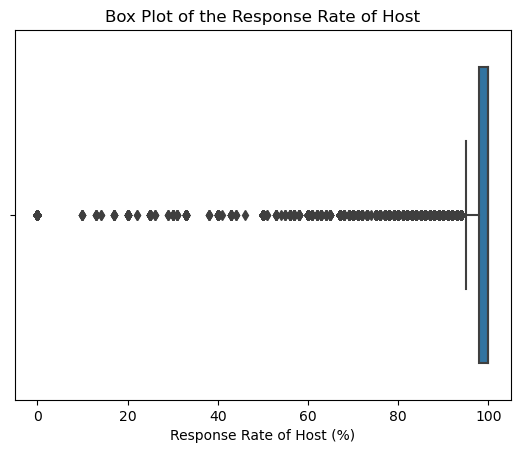

In [33]:
sns.boxplot(x=df['host_response_rate'])
plt.xlabel('Response Rate of Host (%)')
plt.title('Box Plot of the Response Rate of Host')
plt.show()

The distribution shown above is left-skewed. Therefore, we use the median for missing values.

In [34]:
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)

Next, we examine `host_acceptance_rate` as below.

In [35]:
df['host_acceptance_rate'].head()

0     22%
1     NaN
2     50%
3     82%
4    100%
Name: host_acceptance_rate, dtype: object

As before, we remove % sign at the end of these strings and convert to float type.

In [36]:
# Exclude the last character, % sign, in the string values, and convert to float.
df['host_acceptance_rate'] = df['host_acceptance_rate'].str[:-1].astype(float)

And we check the percentage of missing values in `host_acceptance_rate`, which is a measure of how often hosts accept or decline reservations ([source](https://www.airbnb.com/resources/hosting-homes/a/understanding-response-rate-and-acceptance-rate-86)).

In [37]:
df['host_acceptance_rate'].isna().sum()/len(df)*100

29.4007175017456

Again, we check its box plot to see if its distribution is skewed, to impute these.

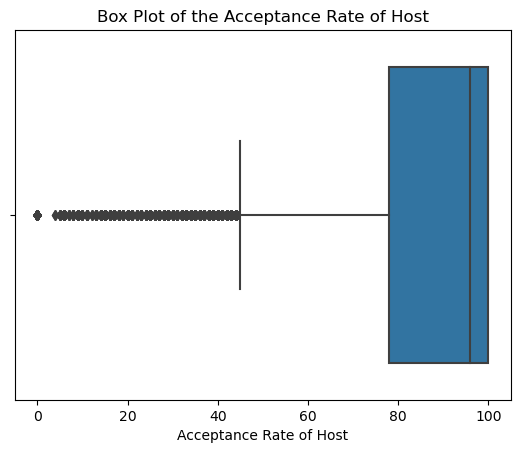

In [38]:
sns.boxplot(x=df['host_acceptance_rate'])
plt.xlabel('Acceptance Rate of Host')
plt.title('Box Plot of the Acceptance Rate of Host')
plt.show()

The distribution shown above is left-skewed. Therefore, we use the median for missing values.

In [39]:
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace=True)

Moving on, there are columns with True/False including `host_is_superhost`, `host_has_profile_pic`, and `host_identity_verified`.

In [40]:
tf_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
df[tf_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified
0,f,t,t
1,f,t,t
2,f,t,t
3,t,t,t
4,f,t,t


And the numbers of missing values of these columns are as below.

In [41]:
df[tf_cols].isna().sum()

host_is_superhost         29
host_has_profile_pic       5
host_identity_verified     5
dtype: int64

We convert these to 1/0, and replace missing values with the majority between True/False.

In [42]:
tf_map = {'t':1, 'f':0, np.nan:np.nan} # Map for the numeric True/False
for col in tf_cols:
    df[col].fillna(df[col].mode().item(), inplace=True) # Impute missing values with the majority between True/False
    df[col] = df[col].apply(lambda x: tf_map[x]).astype(int) # Apply the mapping on the string

df[tf_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified
0,0,1,1
1,0,1,1
2,0,1,1
3,1,1,1
4,0,1,1


Next columns are `host_listings_count`, `host_total_listings_count`, `calculated_host_listings_count`, `calculated_host_listings_count_entire_homes`, `calculated_host_listings_count_private_rooms`, and `calculated_host_listings_count_shared_rooms`. The difference between the former three columns is as follows.
- `host_listings_count`: the total number of active listings that a host has on Airbnb.
- `host_total_listings_count`: the total number of active/inactive listings that a host has on Airbnb.
- `calculated_host_listings_count`: the total number of unique and active listings that a host has on Airbnb.

The latter three columns are `calculated_host_listings_count` for each listing type, either entire homes, private rooms, or shared rooms.

In [43]:
df[['host_listings_count', 'host_total_listings_count',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms']].head()

,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6.0,9.0,3,3,0,0
1,1.0,5.0,1,0,1,0
2,1.0,5.0,1,1,0,0
3,2.0,2.0,2,0,2,0
4,1.0,1.0,1,1,0,0


The percentages of missing values in these columns are as below.

In [44]:
cols_host_listings_cnt = ['host_listings_count', 'host_total_listings_count',
                          'calculated_host_listings_count',
                          'calculated_host_listings_count_entire_homes',
                          'calculated_host_listings_count_private_rooms',
                          'calculated_host_listings_count_shared_rooms']
df[cols_host_listings_cnt].isna().sum()/len(df)*100

host_listings_count                             0.012039
host_total_listings_count                       0.012039
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
dtype: float64

We again check their box plot to see if their distributions are skewed, to impute these.

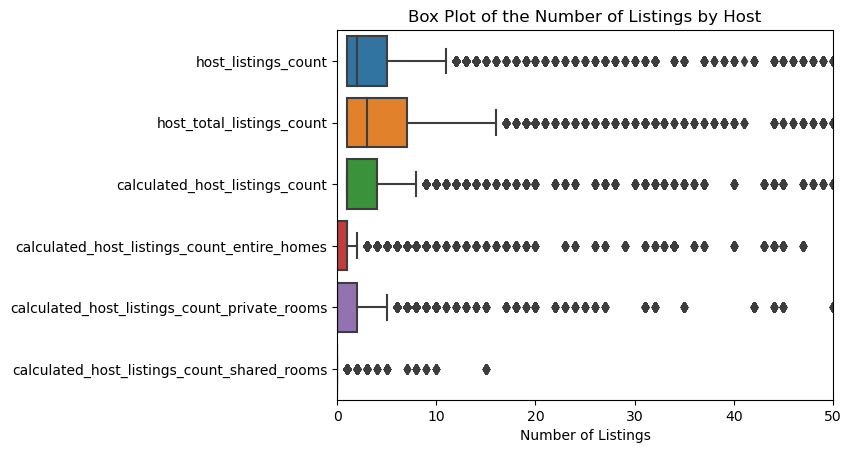

In [45]:
sns.boxplot(data=df[cols_host_listings_cnt], orient='h')
plt.xlabel('Number of Listings')
plt.title('Box Plot of the Number of Listings by Host')
plt.xlim(left=0, right=50)
plt.show()

The above distributions are right-skewed. In addition, we check their value percentages as below.

In [46]:
df_host_pct = pd.DataFrame(index=[0, 1, 2, 3, 4]) # See only listing counts of 0, 1, ..., 4.
for col in cols_host_listings_cnt:
    df_host_pct[col] = df[col].value_counts()/len(df)*100.

df_host_pct

,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,NaN,NaN,NaN,35.533190,52.868803,98.008812
1,48.243565,30.161558,53.242000,40.201767,21.474490,1.117184
2,14.277803,17.870127,13.112465,7.097970,7.085932,0.269665
3,6.941468,10.947921,6.363614,2.701466,4.155732,0.267257
4,4.603568,6.910168,4.025714,1.974334,2.458286,0.057785


Most of the values are 1 for `host_listings_count`, `host_total_listings_count`, `calculated_host_listings_count`, and `calculated_host_listings_count_entire_homes`, and 0 for `calculated_host_listings_count_private_rooms` and `calculated_host_listings_count_shared_rooms`. Thus, rather than their median, we impute missing values with their modes (i.e. the majority), as below.

In [47]:
for col in cols_host_listings_cnt:
    df[col].fillna(df[col].mode().item(), inplace=True)
    df[col] = df[col].astype(int) # Set data type as integer

Additinally, we can generate a bar plot of listings per host. For this, we make a dataframe with a column `Listings per Host` whose values are 1, 2, ..., 9, and 10+, where 10+ corresponds to the cases when `host_listings_count` $>=10$, and another column `Listings` which is the count of each case.

In [48]:
# Make a dataframe for values of host_listings_count and its count.
df_host_listings = pd.DataFrame({'Listings per Host':df['host_listings_count'].value_counts().index.astype(int), 'Listings':df['host_listings_count'].value_counts().values})
# Make a separate Series for the total counts of the cases host_listings_count >= 10
host_listings_over10 = df_host_listings.loc[df_host_listings['Listings per Host'] >= 10, :].sum()
# In the original dataframe, df_host_listings, take cases with host_listings_count from 1 to 9
df_host_listings = df_host_listings.loc[df_host_listings['Listings per Host'] < 10, :]
# Append host_listings_over10 as an additional row
df_host_listings = df_host_listings.append(host_listings_over10, ignore_index = True)
# Set the data type of 'Listings per Host' as string
df_host_listings['Listings per Host'] = df_host_listings['Listings per Host'].astype(str)
# Change the name of the last row of 'Listings per Host' as '10+'
df_host_listings.loc[9, 'Listings per Host'] = '10+'
df_host_listings

/var/folders/gb/lnfs6rn53blb3xs_kbdwr8_h0000gp/T/ipykernel_4720/1901596113.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_host_listings = df_host_listings.append(host_listings_over10, ignore_index = True)


,Listings per Host,Listings
0,1,20042
1,2,5930
2,3,2883
3,4,1912
4,5,1155
5,6,890
6,7,638
7,8,529
8,9,406
9,10+,7148


The bar plot of this is drawn below.

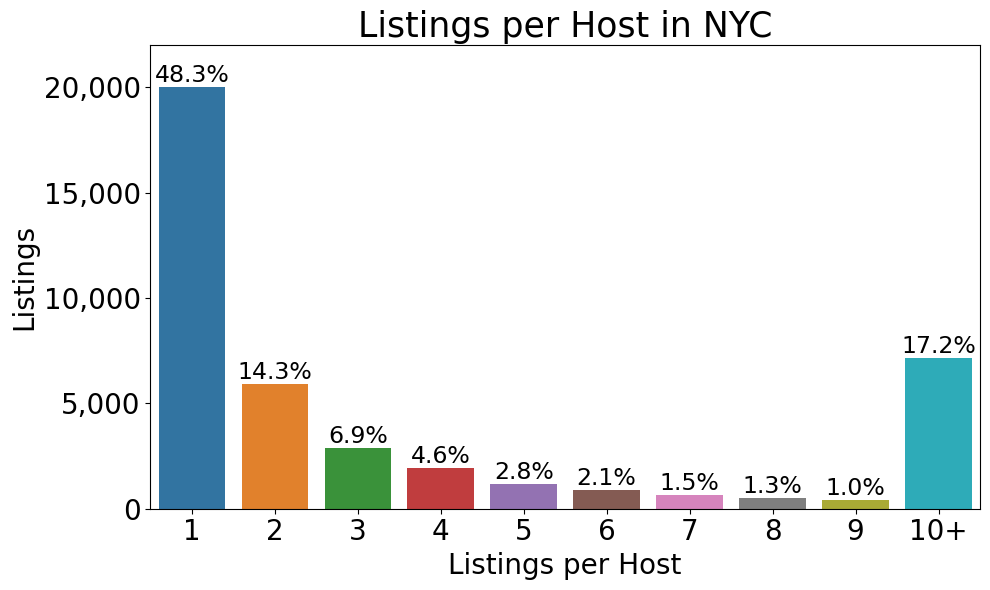

In [49]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Listings per Host', y='Listings', data=df_host_listings)

# Compute percentage of each count and put the text above each bar
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/df_host_listings['Listings'].sum())
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (i, y), size = 17, ha='center', va='bottom')

plt.title('Listings per Host in NYC', fontsize=25)
plt.ylim(top=22000)
plt.xlabel('Listings per Host', fontsize=20)
plt.ylabel('Listings', fontsize=20)
plt.tick_params('both', labelsize=20)
# Set the format of yticks as having comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('figures/listings_per_host.pdf')

plt.show()

This bar plot indicates that more than 50 % of the listings are owned by hosts with multiple listings. This might be useful for the prediction model, if, for example, hosts with multiple listings are more likely to set the price closer to the optimum than hosts with a single listing.

We also have `host_verifications` which is the verification methods that the host set.

In [50]:
df['host_verifications'].head()

0    ['email', 'phone', 'work_email']
1                  ['email', 'phone']
2                  ['email', 'phone']
3                  ['email', 'phone']
4                  ['email', 'phone']
Name: host_verifications, dtype: object

We check what combinations of verification methods exist as below.

In [51]:
df['host_verifications'].unique()

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['phone']", "['phone', 'work_email']", 'None', "['email']", '[]',
       "['email', 'work_email']"], dtype=object)

For these, we make three columns, `host_verifications_email`, `host_verifications_phone`, and `host_verifications_work_email`, and assign 1 to each if it exists in `host_verifications`.

In [52]:
# In the string value of 'host_verifications', check if each method exists, and if so, assign 1, If not, assign 0.
df['host_verifications_email'] = df['host_verifications'].str.contains("'email'").astype(int)
df['host_verifications_phone'] = df['host_verifications'].str.contains("'phone'").astype(int)
df['host_verifications_work_email'] = df['host_verifications'].str.contains("'work_email'").astype(int)
df[['host_verifications', 'host_verifications_email', 'host_verifications_phone', 'host_verifications_work_email']]

,host_verifications,host_verifications_email,host_verifications_phone,host_verifications_work_email
0,"['email', 'phone', 'work_email']",1,1,1
1,"['email', 'phone']",1,1,0
2,"['email', 'phone']",1,1,0
3,"['email', 'phone']",1,1,0
4,"['email', 'phone']",1,1,0
...,...,...,...,...
41528,"['email', 'phone']",1,1,0
41529,['phone'],0,1,0
41530,"['email', 'phone', 'work_email']",1,1,1
41531,['phone'],0,1,0


We converted `host_verifications` into three columns, so we drop it.

In [53]:
df.drop(columns=['host_verifications'], inplace=True)

## 5. Listing-related features

We move on to features that are related to the listings. We start with columns having True/False including `has_availability` and `instant_bookable`.

In [54]:
tf_cols = ['has_availability', 'instant_bookable']
df[tf_cols].head()

,has_availability,instant_bookable
0,t,f
1,t,f
2,t,f
3,t,f
4,t,f


And there are no missing values in these columns as shown below.

In [55]:
df[tf_cols].isna().sum()

has_availability    0
instant_bookable    0
dtype: int64

Their True/False percentages are as below.

In [56]:
df['has_availability'].value_counts()/len(df)*100.

t    84.94691
f    15.05309
Name: has_availability, dtype: float64

In [57]:
df['instant_bookable'].value_counts()/len(df)*100.

f    79.751041
t    20.248959
Name: instant_bookable, dtype: float64

There are more True in `has_availability` and more False in `instant_bookable`. We convert these to 1/0 as done before in the host-related features.

In [58]:
tf_map = {'t':1, 'f':0} # Map for the numeric True/False
for col in tf_cols:
    df[col] = df[col].apply(lambda x: tf_map[x]).astype(int) # Apply the mapping on the string

df[tf_cols].head()

,has_availability,instant_bookable
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Next, we work on `room_type` and `property_type`. The difference between them is following.
- `room_type`: the type of room or space that is available for guests to book.
- `property_type`: the type of property that is being listed. The possible values can be more diverse and include "Apartment", "House", "Loft", etc.

We first look into `room_type` column.

In [59]:
df[['room_type']].head()

,room_type
0,Entire home/apt
1,Private room
2,Entire home/apt
3,Private room
4,Entire home/apt


In [60]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

There are four room types: 'Entire home/apt', 'Private room', 'Hotel room', and 'Shared room'. We can visualize this using a bar plot as below.

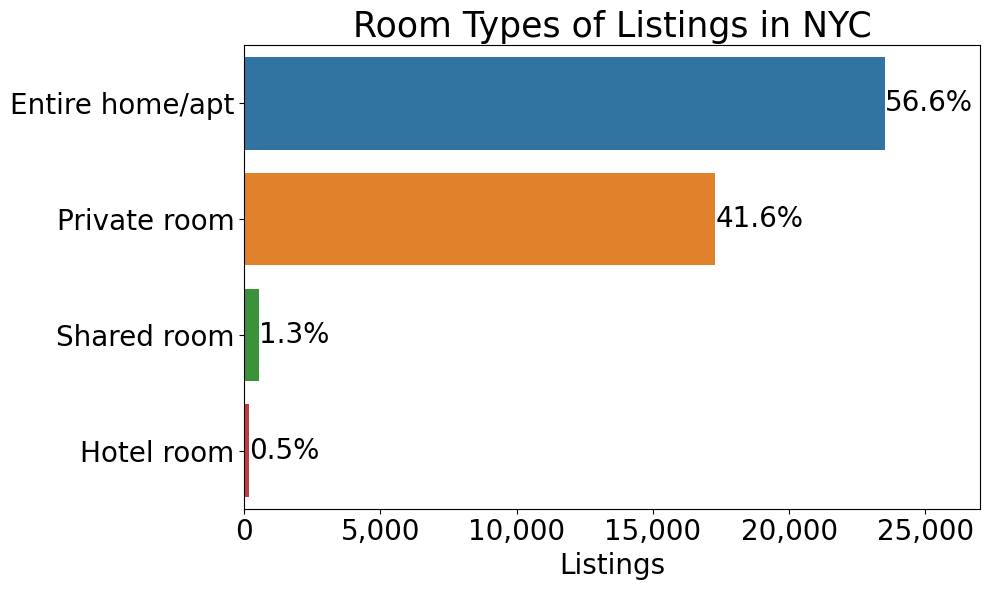

In [61]:
# Make a dataframe with a 'Room Type' column and 'Listings' column for the value counts.
df_room_type = pd.DataFrame({'Room Type':df['room_type'].value_counts().index, 'Listings':df['room_type'].value_counts().values})
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Listings', y='Room Type', data=df_room_type)

# Compute percentage of each count and put the text to the right of each bar
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_width()/df_room_type['Listings'].sum())
    x = p.get_x() + p.get_width()
    ax.annotate(percentage, (x, i), size = 20, va='center')

plt.title('Room Types of Listings in NYC', fontsize=25)
plt.xlim(right=27000)
plt.xlabel('Listings', fontsize=20)
plt.ylabel('', fontsize=15)
plt.tick_params('both', labelsize=20)
# Set the format of xticks as having comma
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('figures/room_types.pdf')
plt.show()

In theory, it should be one-hot encoded for training data when we do modeling, but here we encode the whole dataset as there are only four types; all four types should appear in both training and testing data even if we encode them prior to the train/test splitting.

In [62]:
# Get one-hot encoded dummies of room_type column, with a prefix 'room_type'
room_type_dummies = pd.get_dummies(df['room_type'], prefix='room_type')
# Replace whitespaces with '_' in the column names
room_type_dummies.columns = room_type_dummies.columns.str.replace(' ', '_')
# Attach room_type_dummies columns to the original dataframe
df = pd.concat([df, room_type_dummies], axis=1)
df[['room_type'] + list(room_type_dummies.columns)]

,room_type,room_type_Entire_home/apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room
0,Entire home/apt,1,0,0,0
1,Private room,0,0,1,0
2,Entire home/apt,1,0,0,0
3,Private room,0,0,1,0
4,Entire home/apt,1,0,0,0
...,...,...,...,...,...
41528,Entire home/apt,1,0,0,0
41529,Private room,0,0,1,0
41530,Private room,0,0,1,0
41531,Entire home/apt,1,0,0,0


We converted `room_type` into four columns, so we drop it.

In [63]:
df.drop(columns=['room_type'], inplace=True)

Next, we work on `property_type`.

In [64]:
df[['property_type']].head()

,property_type
0,Entire rental unit
1,Private room in rental unit
2,Entire rental unit
3,Private room in rental unit
4,Entire rental unit


There are 80 different values as shown below.

In [65]:
len(df['property_type'].unique())

80

We first one-hot encode these by getting dummies as below.

In [66]:
# Get one-hot encoded dummies of room_type column, with a prefix 'property_type'
property_type_dummies = pd.get_dummies(df['property_type'], prefix='property_type')
# Replace whitespaces with '_' in the column names
property_type_dummies.columns = property_type_dummies.columns.str.replace(' ', '_')
property_type_dummies

,property_type_Barn,property_type_Boat,property_type_Camper/RV,property_type_Casa_particular,property_type_Castle,property_type_Cave,property_type_Entire_bed_and_breakfast,property_type_Entire_bungalow,property_type_Entire_condo,property_type_Entire_cottage,...,property_type_Shared_room_in_guesthouse,property_type_Shared_room_in_home,property_type_Shared_room_in_loft,property_type_Shared_room_in_rental_unit,property_type_Shared_room_in_serviced_apartment,property_type_Shared_room_in_shepherd's_hut,property_type_Shared_room_in_townhouse,property_type_Shared_room_in_vacation_home,property_type_Tent,property_type_Tiny_home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 80 columns in the encoded dataframe. From these, we check the top 5 columns in terms of percentage of appearance.

In [67]:
# Compute the percentage of appearance and take top 5
property_type_percentage = property_type_dummies.sum().sort_values(ascending=False).head(5)/len(property_type_dummies)*100.
property_type_percentage

property_type_Entire_rental_unit             42.325380
property_type_Private_room_in_rental_unit    26.472925
property_type_Private_room_in_home            5.292177
property_type_Entire_condo                    4.069054
property_type_Entire_home                     3.775311
dtype: float64

There sum is as below.

In [68]:
property_type_percentage.sum()

81.93484698914116

These 5 properties take near 80 % of the whole data. Thus, we can take only these 5 columns as the others appear relatively few times.

In [69]:
property_type_dummies = property_type_dummies.loc[:, list(property_type_percentage.index)]
property_type_dummies.head()

,property_type_Entire_rental_unit,property_type_Private_room_in_rental_unit,property_type_Private_room_in_home,property_type_Entire_condo,property_type_Entire_home
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


We append this to our original dataframe.

In [70]:
df = pd.concat([df, property_type_dummies], axis=1)
df.drop(columns=['property_type'], inplace=True)

Next we investigate columns related to bathrooms. `bathrooms` column is empty, as shown below.

In [71]:
df['bathrooms'].isna().sum()/len(df)*100

100.0

Therefore, we drop `bathrooms`.

In [72]:
df.drop(columns=['bathrooms'], inplace=True)

`bathrooms_text` column contains values as below.

In [73]:
df['bathrooms_text'].unique()

array(['1 bath', '1 shared bath', '1.5 baths', nan, '1 private bath',
       '2 baths', '2.5 baths', '3 baths', '1.5 shared baths',
       '2 shared baths', 'Half-bath', '0 baths', '4 baths',
       '0 shared baths', 'Shared half-bath', 'Private half-bath',
       '5.5 baths', '4.5 baths', '2.5 shared baths', '3.5 baths',
       '15.5 baths', '5 baths', '3 shared baths', '4 shared baths',
       '6 baths', '3.5 shared baths', '4.5 shared baths', '6.5 baths',
       '7 baths', '6 shared baths', '8 baths'], dtype=object)

And their value percentages are as below.

In [74]:
df['bathrooms_text'].value_counts().head()/len(df)*100.

1 bath            52.392074
1 shared bath     23.087665
1 private bath     6.965545
2 baths            6.570679
1.5 baths          2.804998
Name: bathrooms_text, dtype: float64

The number of missing values are as below.

In [75]:
df['bathrooms_text'].isna().sum()

77

We first replace these missing values with the majority, '1 bath', as more than half of the values are '1 bath'.

In [76]:
df['bathrooms_text'].fillna(df['bathrooms_text'].mode().item(), inplace=True)

The values in `bathrooms_text` are either shared, private, or none of these. Thus, we make two boolean columns, `bathrooms_shared` and `bathrooms_private`, and assign 1 if each type exists in `bathrooms_text`.

In [77]:
# In the string value of 'bathrooms_text', check if each type exists, and if so, assign 1, If not, assign 0.
df['bathrooms_shared'] = df['bathrooms_text'].str.contains('shared', case=False).astype(int)
df['bathrooms_private'] = df['bathrooms_text'].str.contains('private', case=False).astype(int)

And we make a column `bathrooms_num` for the number of baths. For `bathrooms_text` containing 'half' such as 'Shared half-bath' or 'Private half-bath', we set them as 0.5.

In [78]:
# Change 'bathrooms_text' containing 'half' to '0.5'
df.loc[df['bathrooms_text'].str.contains('half', case=False), 'bathrooms_text'] = '0.5'
# Take the first token of 'bathrooms_text' and set their float as 'bathrooms_num'
df['bathrooms_num'] = df['bathrooms_text'].str.split().str[0].astype(float)
df[['bathrooms_text', 'bathrooms_shared', 'bathrooms_private', 'bathrooms_num']]

,bathrooms_text,bathrooms_shared,bathrooms_private,bathrooms_num
0,1 bath,0,0,1.0
1,1 shared bath,1,0,1.0
2,1.5 baths,0,0,1.5
3,1 bath,0,0,1.0
4,1 bath,0,0,1.0
...,...,...,...,...
41528,1 bath,0,0,1.0
41529,1 private bath,0,1,1.0
41530,1.5 shared baths,1,0,1.5
41531,1 bath,0,0,1.0


We converted `bathrooms_text` into three columns, so we drop it.

In [79]:
df.drop(columns=['bathrooms_text'], inplace=True)

We move on to the columns related to bedrooms. For `bedrooms` column, the percentage of missing values is as below.

In [80]:
df['bedrooms'].isna().sum()/len(df)*100

9.202321045915296

And the value percentages of `bedrooms` are as below.

In [81]:
df['bedrooms'].value_counts()/len(df)*100.

1.0     67.498134
2.0     15.168661
3.0      5.947078
4.0      1.644475
5.0      0.361159
6.0      0.120386
7.0      0.021670
8.0      0.016854
9.0      0.014446
14.0     0.002408
11.0     0.002408
Name: bedrooms, dtype: float64

As near 68 % of `bedrooms` are 1, we replace missing values with 1.

In [82]:
df['bedrooms'].fillna(df['bedrooms'].mode().item(), inplace=True)

In `beds` columnm, the percentage of missing values is as below.

In [83]:
df['beds'].isna().sum()/len(df)*100.

2.2656682637902392

And the value percentages of `beds` are as below.

In [84]:
df['beds'].value_counts().head()/len(df)*100.

1.0    61.534202
2.0    21.414297
3.0     8.393326
4.0     3.679002
5.0     1.295356
Name: beds, dtype: float64

As near 62 % of `beds` are 1, we replace missing values with 1.

In [85]:
df['beds'].fillna(df['beds'].mode().item(), inplace=True)

Next, we investigate columns related to minimum and maximum nights. `minimum_nights` is a minimum night stay requirement set by the host. `minimum_minimum_nights` is calculated by aggregating the minimum night stay requirements across all the available calendar dates for each listing, and then taking the minimum of those values. Similar meanings can be applied to other columns, including `maximum_nights`, `maximum_minimum_nights`, `minimum_maximum_nights`, `maximum_maximum_nights`, `minimum_nights_avg_ntm`, and `maximum_nights_avg_ntm`, where 'avg' stands for the average and 'ntm' stands for the next three months. Their percentage of missing values are as below.

In [86]:
df[['minimum_nights', 'maximum_nights', \
    'minimum_minimum_nights', 'maximum_minimum_nights', \
    'minimum_maximum_nights', 'maximum_maximum_nights', \
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']].isna().sum()/len(df)*100.

minimum_nights            0.000000
maximum_nights            0.000000
minimum_minimum_nights    0.033708
maximum_minimum_nights    0.033708
minimum_maximum_nights    0.033708
maximum_maximum_nights    0.033708
minimum_nights_avg_ntm    0.033708
maximum_nights_avg_ntm    0.033708
dtype: float64

Here, for our prediction model, we only take `minimum_nights` and `maximum_nights` as they are relatively more "intrinsic" compared to the other columns which can vary depending on the calendar status.

In [87]:
df.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm',
                 'minimum_maximum_nights', 'maximum_maximum_nights', 'maximum_nights_avg_ntm'], inplace=True)

There is `amenities` column which contains list of tags indicating which amenities a listing is equipped with.

In [88]:
df['amenities'].head()

0    ["Carbon monoxide alarm", "Stove", "Bathtub", ...
1    ["Hair dryer", "Smoke alarm", "Carbon monoxide...
2    ["HDTV with Disney+, HBO Max, standard cable, ...
3    ["Heating", "Wifi", "Long term stays allowed",...
4    ["Carbon monoxide alarm", "Shampoo", "Stove", ...
Name: amenities, dtype: object

These are strings which can be converted to a list of strings as below.

In [89]:
# Remove [, ", and ] in the leading and trailing of the string, and split with delimiter ", "
df['amenities'] = df['amenities'].str.strip('["]').str.split('", "')
df['amenities'].head()

0    [Carbon monoxide alarm, Stove, Bathtub, TV, Ki...
1    [Hair dryer, Smoke alarm, Carbon monoxide alar...
2    [HDTV with Disney+, HBO Max, standard cable, R...
3    [Heating, Wifi, Long term stays allowed, Kitch...
4    [Carbon monoxide alarm, Shampoo, Stove, TV, Ki...
Name: amenities, dtype: object

To encode these, we use TransactionEncoder from mlxtend library.

In [90]:
from mlxtend.preprocessing import TransactionEncoder

amenities_te = TransactionEncoder()
amenities = amenities_te.fit_transform(df['amenities'])
amenities_df = pd.DataFrame(amenities, columns=amenities_te.columns_, index=df.index, dtype=int)
amenities_df.head()

,,Bose Speaker Bluetooth sound system,Bowers & Wilkins sound system,Eco Botanics body soap,Eco Botanics travel size body soap,Eco Earth Travel Shampoo and Conditioner Set conditioner,Eco Earth Travel Shampoo and Conditioner Set shampoo,Eco Well Travel Shampoo and Conditioner Set shampoo,Frigidaire refrigerator,Frigidaire stainless steel oven,...,\u201cTerra Pure Earth Conscious\u201d shampoo,\u2026. body soap,\u2026. conditioner,\u2026. shampoo,\u6b27\u83b1\u96c5 body soap,\u6d77\u5c14 refrigerator,\ud83d\udd4a body soap,\uff3a oven,\uff3a refrigerator,\uff3a shampoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 8,156 columns in this encoded dataframe. Among these columns, we take features which appear at least 33 % in the whole listings.

In [91]:
amenities_df = amenities_df.loc[:, amenities_df.sum() > len(amenities_df)/3]
amenities_df.head()

,Air conditioning,Bed linens,Carbon monoxide alarm,Cooking basics,Dedicated workspace,Dishes and silverware,Essentials,Fire extinguisher,First aid kit,Free street parking,...,Kitchen,Long term stays allowed,Microwave,Oven,Refrigerator,Self check-in,Shampoo,Smoke alarm,TV,Wifi
0,1,1,1,1,1,1,1,1,0,1,...,1,1,0,1,1,1,0,1,1,1
1,1,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,1
2,1,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,1,1,1,1,0,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1


Now there are 25 columns after filtering. For these columns, we add a prefix 'amenities_' and replace whitespaces with '_'.

In [92]:
amenities_df = amenities_df.add_prefix('amenities_')
amenities_df.columns = amenities_df.columns.str.replace(' ', '_')

We append this `amenities_df` to the original dataframe, and drop `amenities`.

In [93]:
df = pd.concat([df, amenities_df], axis=1)
df.drop(columns=['amenities'], inplace=True)

Each listing has its `longitude` and `latitude`, and there are no missing values.

In [94]:
df[['longitude', 'latitude']].isna().sum()

longitude    0
latitude     0
dtype: int64

There are also `neighbourhood`, `neighbourhood_cleansed`, and `neighbourhood_group_cleansed`, which all contain information on the location of the listing.

In [95]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,"New York, United States",Midtown,Manhattan
1,"New York, United States",Upper West Side,Manhattan
2,NaN,Sunset Park,Brooklyn
3,NaN,Bedford-Stuyvesant,Brooklyn
4,NaN,Williamsburg,Brooklyn
...,...,...,...
41528,NaN,Kingsbridge,Bronx
41529,NaN,Jamaica,Queens
41530,NaN,Morningside Heights,Manhattan
41531,NaN,Unionport,Bronx


The location information is already presented in `longitude` and `latitude`, so we drop these columns.

In [96]:
df.drop(columns=['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed'], inplace=True)

There are more columns that can be dropped because they are not quite useful for our prediction model, such as columns with URL's, ID's, location of hosts, etc.

In [97]:
columns_dropping = ['id', 'listing_url', 'scrape_id', 'source', 'last_scraped', \
                    'name', 'description', 'neighborhood_overview', 'picture_url', \
                    'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', \
                    'host_location', 'host_neighbourhood', 'host_picture_url', 'calendar_updated', 'calendar_last_scraped']
df.drop(columns=columns_dropping, inplace=True)

## 6. Separation into healthy and unhealthy listings

Here, we separate the dataset into "healthy" and "unhealthy" listings, in terms of both number of reviews and review scores, and use healthy ones for the prediction model. This is because we want our prediction model to predict prices which are optimally set by healthy listings. The columns related to reviews will only be used for the separation and will be dropped for the model input, as we want our model to use intrinsic features rather than changeable features (also, to prevent extrapolation from inputs of unhealthy listings unseen during the training, such as low scores). For this, we first work on columns related to the number of reviews.

In [98]:
col_num_reviews = ['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
                   'reviews_per_month', 'first_review', 'last_review']
df[col_num_reviews].head()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,first_review,last_review
0,49,1,0,0.31,2009-11-21,2022-06-21
1,118,0,0,0.73,2009-09-07,2017-07-21
2,3,1,0,0.03,2014-01-02,2022-08-10
3,50,0,0,0.30,2009-05-28,2019-12-02
4,187,5,0,1.13,2009-05-25,2022-11-02


Their percentages of missing values are as below.

In [99]:
df[col_num_reviews].isna().sum()/len(df)*100

number_of_reviews          0.000000
number_of_reviews_ltm      0.000000
number_of_reviews_l30d     0.000000
reviews_per_month         22.615751
first_review              22.615751
last_review               22.615751
dtype: float64

The box plot of `number_of_reviews` is as below.

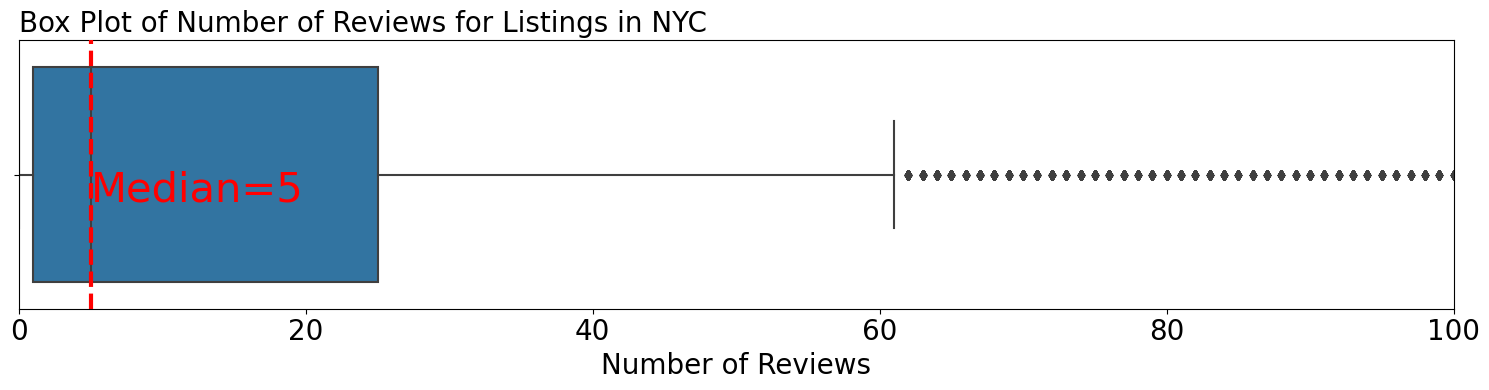

In [100]:
plt.figure(figsize=(15, 4))
nr_quant50 = df['number_of_reviews'].quantile(0.5)
plt.axvline(nr_quant50, ls='--', c='r', lw=3, zorder=3)
plt.text(nr_quant50, 0.1, 'Median=' + str(int(nr_quant50)), ha='left', c='r', fontsize=30)
sns.boxplot(x=df['number_of_reviews'])
plt.xlim(left=0., right=100.)
plt.tick_params('x', labelsize=20)
plt.xlabel('Number of Reviews', fontsize=20)
plt.title('Box Plot of Number of Reviews for Listings in NYC', fontsize=20, loc='left')
plt.tight_layout()
plt.savefig('figures/box_num_reviews.pdf')
plt.show()

It has a median of 5 reviews. Here, we assume that 50 % of the listings with at least 5 reviews as "healthy" listings, and if not, we regard them as "unhealthy".

For columns related to the review scores, we have 7 columns as below.

In [101]:
col_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',\
               'review_scores_communication', 'review_scores_location', 'review_scores_value']
df[col_scores].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.68,4.73,4.63,4.77,4.80,4.81,4.40
1,4.91,4.83,4.82,4.97,4.95,4.94,4.92
2,5.00,5.00,5.00,5.00,5.00,4.67,5.00
3,4.52,4.22,4.09,4.91,4.91,4.47,4.52
4,4.57,4.59,4.86,4.84,4.80,4.67,4.56


For the healthy/unhealthy separation, we use the average score by adding `scores_avg` column.

In [102]:
df['scores_avg'] = df[col_scores].mean(axis=1)

It has missing values when `number_of_reviews` is zero.

In [103]:
df.loc[df['number_of_reviews'] == 0, ['number_of_reviews', 'scores_avg']].head()

,number_of_reviews,scores_avg
17,0,NaN
37,0,NaN
50,0,NaN
103,0,NaN
109,0,NaN


These listings which have no reviews yet are regarded as unhealthy. To clarify the separation based on scores, we draw a box plot of `scores_avg` as below.

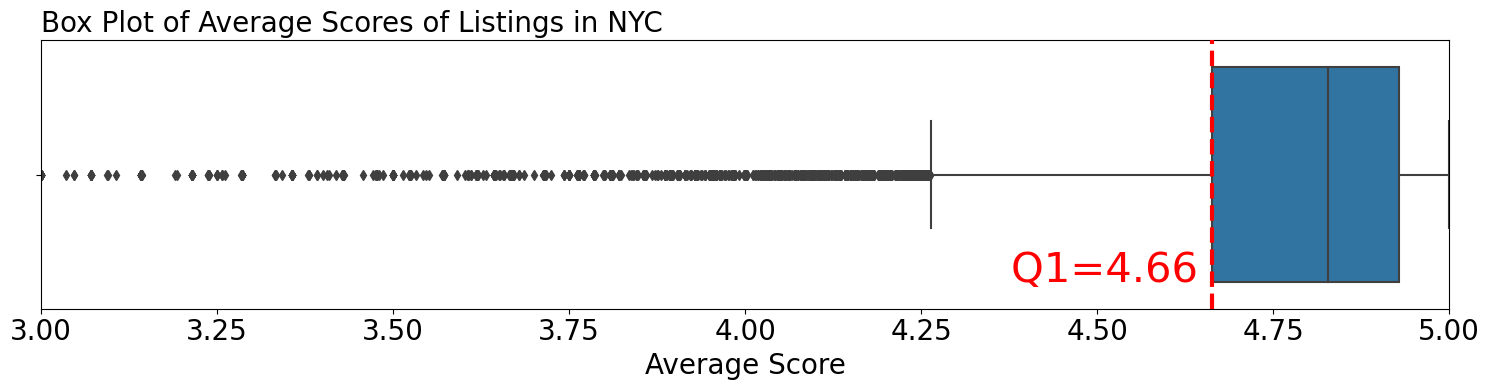

In [104]:
plt.figure(figsize=(15, 4))
score_quant25 = df['scores_avg'].quantile(0.25)
plt.axvline(score_quant25, ls='--', c='r', lw=3, zorder=3)
plt.text(score_quant25, 0.4, 'Q1=' + str(round(score_quant25, 2)) + ' ', ha='right', c='r', fontsize=30)
sns.boxplot(x=df['scores_avg'])
plt.xlim(left=3., right=5.)
plt.tick_params('x', labelsize=20)
plt.xlabel('Average Score', fontsize=20)
plt.title('Box Plot of Average Scores of Listings in NYC', fontsize=20, loc='left')
plt.tight_layout()
plt.savefig('figures/box_rating.pdf')
plt.show()

It has the 25 % quantile at 4.66. Here, we assume that 75 % of the listings with at least 4.66 average scores as "healthy" listings, and if not, we regard them as "unhealthy".

We apply these two thresholds, in the number of reviews and the average scores, to the separation as below.

In [105]:
# Take indices of healthy listings
idx_healthy_listings = (df['number_of_reviews'] >= nr_quant50) & (df['scores_avg'] >= score_quant25)
df_unhealthy = df.loc[~idx_healthy_listings, :]
df = df.loc[idx_healthy_listings, :]

In [106]:
print(f"Shape of the dataframe with healthy listings: {df.shape}")
print(f"Shape of the dataframe with unhealthy listings: {df_unhealthy.shape}")

Shape of the dataframe with healthy listings: (16874, 81)
Shape of the dataframe with unhealthy listings: (24659, 81)


Now, there are 16,874 rows to be used for modeling. As mentioned before, we drop all columns related to reviews.

In [107]:
df.drop(columns=col_num_reviews + col_scores + ['scores_avg'], inplace=True)
df_unhealthy.drop(columns=col_num_reviews + col_scores + ['scores_avg'], inplace=True)

Lastly, we look at columns related to availabilities. `availability_x` is the number of days available to book in the next x days. We compare the availabilities of healthy and unhealthy listings, to see if healthy listings have indeed smaller availabilities than unhealthy listings, as healthy listings are more popular in general.

In [108]:
df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].head()

,availability_30,availability_60,availability_90,availability_365
0,30,60,90,365
1,0,0,0,0
4,23,23,35,151
6,3,33,63,308
8,15,38,38,38


In [109]:
df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].isna().sum()

availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

There are no missing values. We draw histograms of these as below.

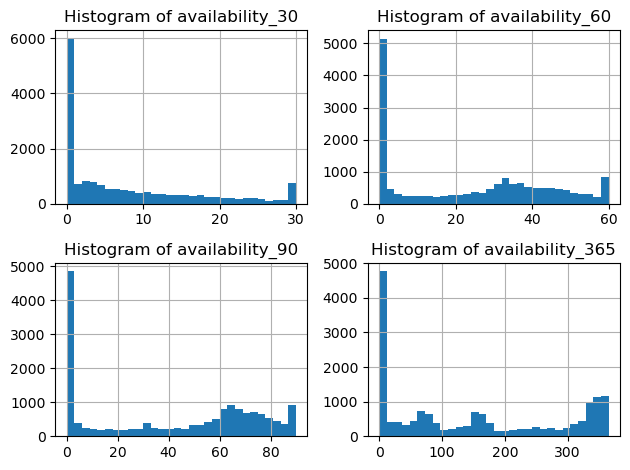

In [110]:
fig, axes = plt.subplots(2, 2)
df['availability_30'].hist(bins=30, ax=axes[0, 0])
df['availability_60'].hist(bins=30, ax=axes[0, 1])
df['availability_90'].hist(bins=30, ax=axes[1, 0])
df['availability_365'].hist(bins=30, ax=axes[1, 1])
axes[0, 0].set_title("Histogram of availability_30")
axes[0, 1].set_title("Histogram of availability_60")
axes[1, 0].set_title("Histogram of availability_90")
axes[1, 1].set_title("Histogram of availability_365")
plt.tight_layout()
plt.show()

`availability_x=0` means either all the next x days are booked, or the booking is closed for the next x days. Therefore, zero availability does not necessarily mean that the listing is very popular, and we exclude these when we compare healthy and unhealthy listings. Thus, we use listings with `availability_30` $> 0$ for the comparison.

In [111]:
availability_30_healthy = df.loc[df['availability_30'] > 0, ['availability_30']]
availability_30_healthy['class'] = 'Healthy Listings' # Label these as Healthy Listings
availability_30_unhealthy = df_unhealthy.loc[df_unhealthy['availability_30'] > 0, ['availability_30']]
availability_30_unhealthy['class'] = 'Unhealthy Listings' # Label these as Unhealthy Listings
# Combine availability dataframes together
availability_30 = pd.concat([availability_30_healthy, availability_30_unhealthy], axis=0)
availability_30

,availability_30,class
0,30,Healthy Listings
4,23,Healthy Listings
6,3,Healthy Listings
8,15,Healthy Listings
10,4,Healthy Listings
...,...,...
41528,9,Unhealthy Listings
41529,26,Unhealthy Listings
41530,20,Unhealthy Listings
41531,18,Unhealthy Listings


Then, we draw two box plots from this availabilities.

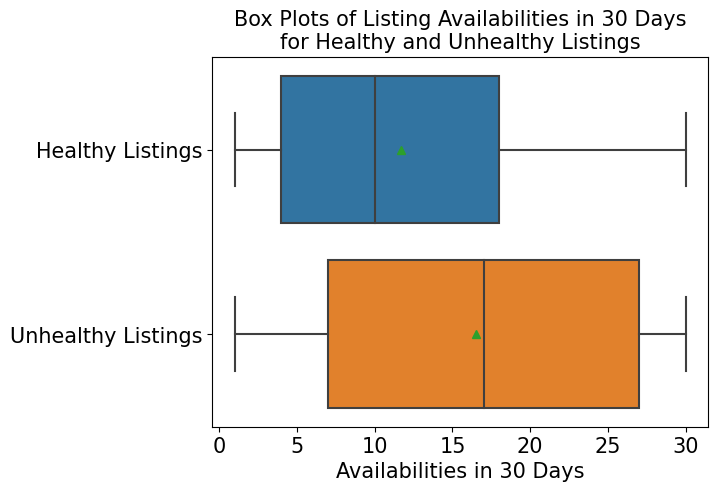

In [112]:
ax = sns.boxplot(x="availability_30", y="class", data=availability_30, showmeans=True)
ax.set_title('Box Plots of Listing Availabilities in 30 Days\nfor Healthy and Unhealthy Listings', fontsize=15)
ax.set_xlabel('Availabilities in 30 Days', fontsize=15)
ax.set_ylabel('', fontsize=15)
ax.tick_params('both', labelsize=15)
plt.savefig('figures/availability_bar_plot.pdf')
plt.show()

Indeed as expected, healthy listings have smaller availabilities in 30 days than unhealthy listings, overall.

In [113]:
avg_decrease_availability_30 = availability_30_unhealthy['availability_30'].mean() - availability_30_healthy['availability_30'].mean()
avg_decrease_availability_30

4.867088103359636

The difference in their mean availabilities is about 5 days. In the analysis part of the other notebook, `Harry_Han_AirBnBPricing_Main.ipynb`, we will assume that unhealthy listings will effectively have 5 less available days if they adjust their price to the optimal price predicted by the model trained with data from healthy listings. For the later analysis, we keep the availability columns in separate dataframes, and drop them in the original dataframes.

In [114]:
availability_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
# Keep availability_cols in separate dataframes
df_availabilities = df[availability_cols]
df_unhealthy_availabilities = df_unhealthy[availability_cols]
# Drop availability_cols from the original dataframes
df.drop(columns=availability_cols, inplace=True)
df_unhealthy.drop(columns=availability_cols, inplace=True)

Now, the dataframe has all 66 numeric columns without missing values.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 40288
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    16874 non-null  int64  
 1   host_response_time                            16874 non-null  int64  
 2   host_response_rate                            16874 non-null  float64
 3   host_acceptance_rate                          16874 non-null  float64
 4   host_is_superhost                             16874 non-null  int64  
 5   host_listings_count                           16874 non-null  int64  
 6   host_total_listings_count                     16874 non-null  int64  
 7   host_has_profile_pic                          16874 non-null  int64  
 8   host_identity_verified                        16874 non-null  int64  
 9   latitude                                      16874 non-null 

As we will use models with regularizations, multicollinearity is not a problem. Even so, it is worth to check the correlation heatmap as shown below.

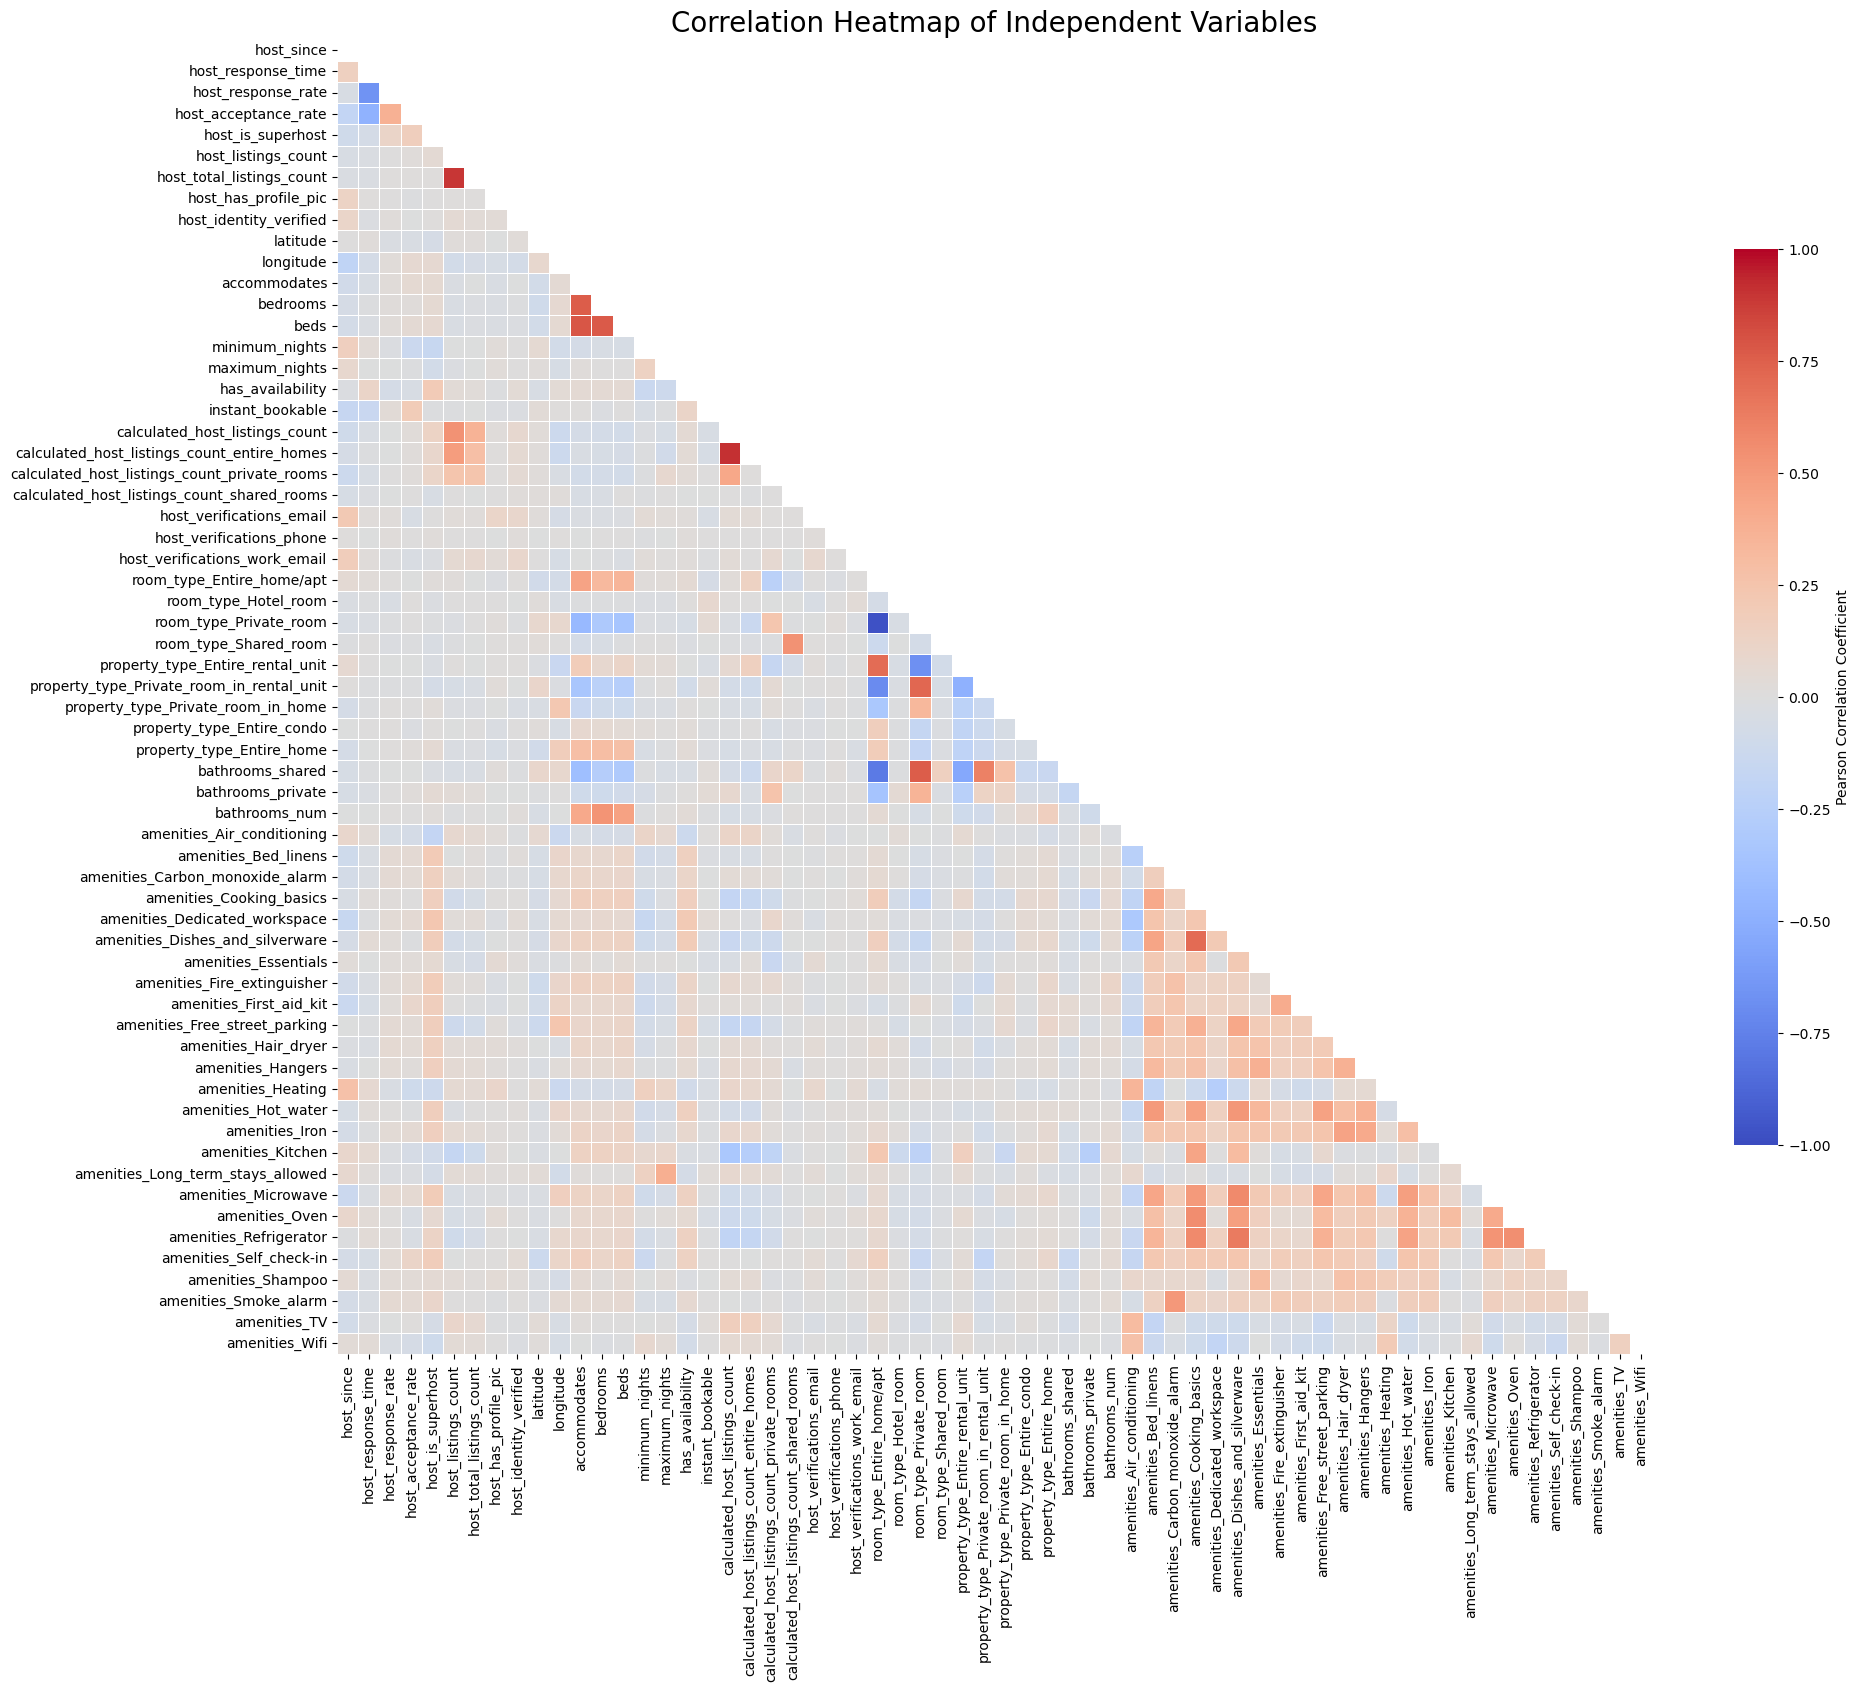

In [116]:
plt.figure(figsize=(20, 20))
corr_df = df.drop(columns=['log_price']).corr()
mask = np.triu(corr_df)
sns.heatmap(corr_df, mask=mask, vmax=1, vmin=-1, center=0, linewidths=.5, square=True,\
            cmap='coolwarm', cbar_kws={'label':'Pearson Correlation Coefficient', 'shrink': .5})
plt.title('Correlation Heatmap of Independent Variables', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

There are a few features with high correlations, such as `calculated_host_listings_count_entire_homes` and `room_type_Entire_home/apt`. As mentioned, we move forward without dropping them. Now, `df` is ready to be split.

## 7. Train-test split

We split `df` which was engineered in the prior sections into a training and a testing data. When we split the data, we use stratification with the bins of the target variable, `log_price`, to maintain the distribution in both training and testing data. Also, we use 20 % of the data as the testing data.

In [117]:
from sklearn.model_selection import train_test_split

# Set 100 bins of the target variable
bins = np.linspace(0, len(df), 100)
# Digitize the target variable with the bins
target_binned = np.digitize(df['log_price'], bins)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['log_price']), \
                                                            df['log_price'], \
                                                            test_size=0.2, \
                                                            stratify=target_binned, random_state=123)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (13499, 62)
Shape of X_test: (3375, 62)


We check the distributions of `y_train` and `y_test` to see if the distribution of `log_price` is maintained.

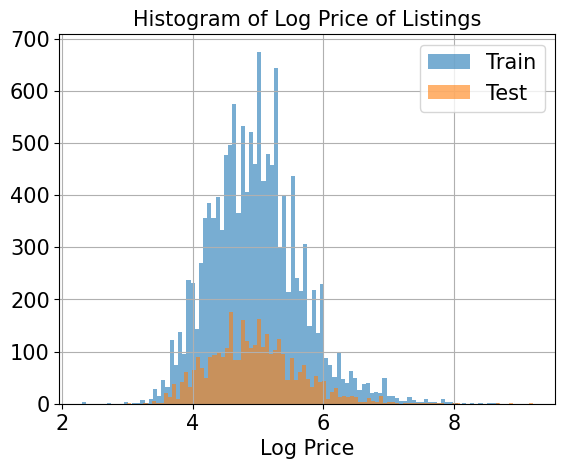

In [118]:
y_train.hist(bins=100, alpha=0.6, label='Train')
y_test.hist(bins=100, alpha=0.6, label='Test')
plt.legend(fontsize=15)
plt.title('Histogram of Log Price of Listings', fontsize=15)
plt.xlabel('Log Price', fontsize=15)
plt.tick_params('both', labelsize=15)
plt.show()

As intended, the target variable is well stratified. We save these dataset to the `data` folder.

In [119]:
pd.concat([X_train, y_train], axis=1).to_csv('data/airbnb_train.csv', index=False)
pd.concat([X_test, y_test], axis=1).to_csv('data/airbnb_test.csv', index=False)

We also save the unhealthy listings dataframe.

In [120]:
df_unhealthy.to_csv('data/airbnb_unhealthy.csv', index=True)

Additionally, we save the availability dataframes for the later analysis.

In [121]:
df_availabilities.to_csv('data/airbnb_availabilities_healthy.csv', index=True)
df_unhealthy_availabilities.to_csv('data/airbnb_availabilities_unhealthy.csv', index=True)

## 8. Summary

In this notebook, we explored features in the NYC AirBnB listings dataset and transformed crucial features into numeric representations for modeling. We separated the listings into healthy and unhealthy datasets, based on their number of reviews and the average review scores. Healthy listings have 5 less available days for booking in average than unhealthy listigs, reflecting that listings with many reviews and high scores are more popular and gain more bookings. As a result, we obtained 16,874 healthy listings which was split into 13,499 training and 3,375 testing data. The dataframes were saved and are ready to be passed to the prediction models.